Cleaning NBA Stats Data With Python And Pandas: Data Project [Part 2 of 3]

In this notebook, we are going through the data that we have compiled into the csv files and cleaning them to remove NaN and zero values. We as well are making sure that players only appear once each year if they have been trading during the season. We remove any additional characters that are present to ensure that our models are able to function easily, and to make sure that the values that we want to use are numbers that can be easily utilized for our prediction model. With cleaning our data (removing unwanted columns, rows, values, etc.), we will be able to create a model to predict which player should be MVP each year.

https://www.youtube.com/watch?v=LobWMsz35NM

In [108]:
import pandas as pd

In [109]:
mvps = pd.read_csv("mvps.csv")

In [110]:
# Uncleaned MVP Data
mvps

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Hakeem Olajuwon,31,HOU,66.0,889.0,1010,0.880,80,...,11.9,3.6,1.6,3.7,0.528,0.421,0.716,14.3,0.210,1994
1,1,2,David Robinson,28,SAS,24.0,730.0,1010,0.723,80,...,10.7,4.8,1.7,3.3,0.507,0.345,0.749,20.0,0.296,1994
2,2,3,Scottie Pippen,28,CHI,7.0,390.0,1010,0.386,72,...,8.7,5.6,2.9,0.8,0.491,0.320,0.660,11.2,0.194,1994
3,3,4,Shaquille O'Neal,21,ORL,3.0,289.0,1010,0.286,81,...,13.2,2.4,0.9,2.9,0.599,0.000,0.554,16.9,0.252,1994
4,4,5,Patrick Ewing,31,NYK,1.0,255.0,1010,0.252,79,...,11.2,2.3,1.1,2.7,0.496,0.286,0.765,13.1,0.211,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,7,8,Stephen Curry,33,GSW,0.0,4.0,1000,0.004,64,...,5.2,6.3,1.3,0.4,0.437,0.380,0.923,8.0,0.173,2022
431,8,9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022
432,9,10T,DeMar DeRozan,32,CHI,0.0,1.0,1000,0.001,76,...,5.2,4.9,0.9,0.3,0.504,0.352,0.877,8.8,0.154,2022
433,10,10T,Kevin Durant,33,BRK,0.0,1.0,1000,0.001,55,...,7.4,6.4,0.9,0.9,0.518,0.383,0.910,8.4,0.198,2022


In [111]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [112]:
# Cleaned MVP Data
mvps

,Player,Year,Pts Won,Pts Max,Share
0,Hakeem Olajuwon,1994,889.0,1010,0.880
1,David Robinson,1994,730.0,1010,0.723
2,Scottie Pippen,1994,390.0,1010,0.386
3,Shaquille O'Neal,1994,289.0,1010,0.286
4,Patrick Ewing,1994,255.0,1010,0.252
...,...,...,...,...,...
430,Stephen Curry,2022,4.0,1000,0.004
431,Chris Paul,2022,2.0,1000,0.002
432,DeMar DeRozan,2022,1.0,1000,0.001
433,Kevin Durant,2022,1.0,1000,0.001


In [113]:
players = pd.read_csv("players.csv")

In [114]:
# Uncleaned player data
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,25,BOS,13,0,12.2,1.8,...,0.9,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,1994
1,1,2,Mahmoud Abdul-Rauf,PG,24,DEN,80,78,32.7,7.4,...,0.3,1.8,2.1,4.5,1.0,0.1,1.9,1.9,18.0,1994
2,2,3,Michael Adams,PG,31,WSB,70,67,33.4,4.1,...,0.5,2.1,2.6,6.9,1.4,0.1,2.4,2.0,12.1,1994
3,3,4,Mark Aguirre,SF,34,LAC,39,0,22.0,4.2,...,0.7,2.3,3.0,2.7,0.5,0.2,1.8,2.5,10.6,1994
4,4,5,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,...,0.4,1.5,1.9,2.6,0.8,0.1,1.2,2.1,8.9,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17478,836,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
17479,837,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
17480,838,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
17481,839,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [115]:
del players["Unnamed: 0"]
del players["Rk"]

In [116]:
# Cleaned player data; We removed the "Unnamed: 0" column and "Rk" columns
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,25,BOS,13,0,12.2,1.8,4.2,.436,...,0.9,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,1994
1,Mahmoud Abdul-Rauf,PG,24,DEN,80,78,32.7,7.4,16.0,.460,...,0.3,1.8,2.1,4.5,1.0,0.1,1.9,1.9,18.0,1994
2,Michael Adams,PG,31,WSB,70,67,33.4,4.1,10.0,.408,...,0.5,2.1,2.6,6.9,1.4,0.1,2.4,2.0,12.1,1994
3,Mark Aguirre,SF,34,LAC,39,0,22.0,4.2,8.9,.468,...,0.7,2.3,3.0,2.7,0.5,0.2,1.8,2.5,10.6,1994
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,.417,...,0.4,1.5,1.9,2.6,0.8,0.1,1.2,2.1,8.9,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17478,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
17479,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
17480,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
17481,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,.567,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [117]:
# Removing the asterisk from some of the player names (The asterisk indicates they are in the hall of fame)
players["Player"] = players["Player"].str.replace("*", "", regex = False)

In [118]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,25,BOS,13,0,12.2,1.8,4.2,.436,...,0.9,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,1994
1,Mahmoud Abdul-Rauf,PG,24,DEN,80,78,32.7,7.4,16.0,.460,...,0.3,1.8,2.1,4.5,1.0,0.1,1.9,1.9,18.0,1994
2,Michael Adams,PG,31,WSB,70,67,33.4,4.1,10.0,.408,...,0.5,2.1,2.6,6.9,1.4,0.1,2.4,2.0,12.1,1994
3,Mark Aguirre,SF,34,LAC,39,0,22.0,4.2,8.9,.468,...,0.7,2.3,3.0,2.7,0.5,0.2,1.8,2.5,10.6,1994
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,.417,...,0.4,1.5,1.9,2.6,0.8,0.1,1.2,2.1,8.9,1994


In [119]:
players.head(20)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,25,BOS,13,0,12.2,1.8,4.2,.436,...,0.9,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,1994
1,Mahmoud Abdul-Rauf,PG,24,DEN,80,78,32.7,7.4,16.0,.460,...,0.3,1.8,2.1,4.5,1.0,0.1,1.9,1.9,18.0,1994
2,Michael Adams,PG,31,WSB,70,67,33.4,4.1,10.0,.408,...,0.5,2.1,2.6,6.9,1.4,0.1,2.4,2.0,12.1,1994
3,Mark Aguirre,SF,34,LAC,39,0,22.0,4.2,8.9,.468,...,0.7,2.3,3.0,2.7,0.5,0.2,1.8,2.5,10.6,1994
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,.417,...,0.4,1.5,1.9,2.6,0.8,0.1,1.2,2.1,8.9,1994
5,Gary Alexander,PF,24,TOT,11,0,5.0,0.7,1.3,.571,...,0.6,0.7,1.4,0.2,0.3,0.0,0.7,0.9,1.7,1994
6,Gary Alexander,PF,24,MIA,4,0,3.0,0.3,0.5,.500,...,0.3,0.5,0.8,0.3,0.0,0.0,0.3,0.8,0.5,1994
7,Gary Alexander,PF,24,CLE,7,0,6.1,1.0,1.7,.583,...,0.9,0.9,1.7,0.1,0.4,0.0,1.0,1.0,2.4,1994
8,Victor Alexander,C,24,GSW,69,39,19.1,3.9,7.3,.530,...,1.7,2.8,4.5,1.0,0.4,0.5,1.2,2.4,8.7,1994
9,Eric Anderson,PF,23,NYK,11,0,3.5,0.6,1.5,.412,...,0.5,1.0,1.5,0.2,0.0,0.1,0.2,0.8,1.9,1994


In [120]:
players.groupby(["Player", "Year"]).get_group(("Gary Alexander", 1994))

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
5,Gary Alexander,PF,24,TOT,11,0,5.0,0.7,1.3,.571,...,0.6,0.7,1.4,0.2,0.3,0.0,0.7,0.9,1.7,1994
6,Gary Alexander,PF,24,MIA,4,0,3.0,0.3,0.5,.500,...,0.3,0.5,0.8,0.3,0.0,0.0,0.3,0.8,0.5,1994
7,Gary Alexander,PF,24,CLE,7,0,6.1,1.0,1.7,.583,...,0.9,0.9,1.7,0.1,0.4,0.0,1.0,1.0,2.4,1994


In [121]:
# We need to iterate through each player and make sure that each player only has one row for each year
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1, :]["Tm"]
        return row
    
players = players.groupby(["Player", "Year"]).apply(single_row)

In [122]:
players.head(20)

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        Year                                                              
A.C. Green    1994 177       A.C. Green  PF  30  PHO  82  55  34.5  5.7  11.3   
              1995 665       A.C. Green  SF  31  PHO  82  52  32.8  3.8   7.5   
              1996 1161      A.C. Green  SF  32  PHO  82  36  25.8  2.6   5.4   
              1997 1736      A.C. Green  PF  33  DAL  83  73  30.0  2.8   5.8   
              1998 2323      A.C. Green  PF  34  DAL  82  68  32.3  3.0   6.5   
              1999 2881      A.C. Green  PF  35  DAL  50  35  18.5  2.2   5.1   
              2000 3409      A.C. Green  PF  36  LAL  82  82  23.5  2.1   4.7   
              2001 3928      A.C. Green  PF  37  MIA  82   1  17.2  1.8   4.0   
A.J. Bramlett 2000 3282   A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   2.6   
A.J. Guyton   2001 3931     A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   5.8   
              2002 4484     A.J. Guyton  PG  23  CHI  45   6  13.5  2.0   5.4   
              2003 4991     A.J. Guyton  PG  24  GSW   2   0   4.5  0.0   2.0   
A.J. Hammons  2017 13412   A.J. Hammons   C  24  DAL  22   0   7.4  0.8   1.9   
A.J. Price    2010 9325      A.J. Price  PG  23  IND  56   2  15.4  2.6   6.3   
              2011 9954      A.J. Price  PG  24  IND  50   0  15.9  2.3   6.4   
              2012 10538     A.J. Price  PG  25  IND  44   1  12.9  1.3   4.0   
              2013 11130     A.J. Price  PG  26  WAS  57  22  22.4  2.8   7.2   
              2014 11760     A.J. Price  SG  27  MIN  28   0   3.5  0.7   1.6   
              2015 12408     A.J. Price  PG  28  PHO  26   0  12.5  2.0   5.3   
Aaron Brooks  2008 7729    Aaron Brooks  PG  23  HOU  51   0  11.9  1.8   4.4   

                           FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player        Year              ...                                           
A.C. Green    1994 177    .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7   
              1995 665    .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
              1996 1161   .484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   
              1997 1736   .483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
              1998 2323   .453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   
              1999 2881   .422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   
              2000 3409   .447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6  1.5   
              2001 3928   .444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   
A.J. Bramlett 2000 3282   .190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4  1.6   
A.J. Guyton   2001 3931   .406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7  1.1   
              2002 4484   .361  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8  0.5   
              2003 4991   .000  ...  0.0  0.0  0.0  1.0  0.5  0.0  0.5  0.0   
A.J. Hammons  2017 13412  .405  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5  1.0   
A.J. Price    2010 9325   .410  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1  0.9   
              2011 9954   .356  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1  1.2   
              2012 10538  .339  ...  0.3  1.1  1.4  2.0  0.5  0.0  0.7  0.7   
              2013 11130  .390  ...  0.4  1.6  2.0  3.6  0.6  0.1  1.1  1.3   
              2014 11760  .413  ...  0.0  0.3  0.4  0.5  0.0  0.0  0.3  0.2   
              2015 12408  .372  ...  0.2  1.0  1.2  1.8  0.3  0.0  0.5  0.6   
Aaron Brooks  2008 7729   .413  ...  0.3  0.8  1.1  1.7  0.3  0.1  0.9  1.4   

                           PTS  Year  
Player        Year                    
A.C. Green    1994 177    14.7  1994  
              1995 665    11.2  1995  
              1996 1161    7.5  1996  
              1997 1736    7.2  1997  
              1998 2323    7.3  1998  
              1999 2881    4.9  1999  
              2000 3409    5.0  2000  
              2001 3928    4.5  2001  
A.J. Bramlett 2000 3282    1.0  2000  
A.J. Guyton   2001 3931    6.0  2001  
              2002 4484    5.4  2002  
    

In [123]:
players.index = players.index.droplevel()

In [124]:
players.index = players.index.droplevel()

In [125]:
players.head(20)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
177,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
665,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
1161,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
1736,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
2323,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998
2881,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,1.6,2.9,4.6,0.5,0.6,0.2,0.4,1.4,4.9,1999
3409,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,2.0,4.0,5.9,1.0,0.6,0.2,0.6,1.5,5.0,2000
3928,A.C. Green,PF,37,MIA,82,1,17.2,1.8,4.0,.444,...,1.3,2.5,3.8,0.5,0.4,0.1,0.5,1.5,4.5,2001
3282,A.J. Bramlett,C,23,CLE,8,0,7.6,0.5,2.6,.190,...,1.5,1.3,2.8,0.0,0.1,0.0,0.4,1.6,1.0,2000
3931,A.J. Guyton,PG,22,CHI,33,8,19.1,2.4,5.8,.406,...,0.3,0.8,1.1,1.9,0.3,0.2,0.7,1.1,6.0,2001


In [126]:
players[players["Player"] == "Gary Alexander"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
5,Gary Alexander,PF,24,CLE,11,0,5.0,0.7,1.3,.571,...,0.6,0.7,1.4,0.2,0.3,0.0,0.7,0.9,1.7,1994


In [127]:
combined = players.merge(mvps, how="outer", on = ["Player", "Year"])

In [128]:
combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
188,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
323,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
325,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
326,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
327,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13052,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13053,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13057,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
13391,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [129]:
# "Pts Won", "Pts Max", "Share" will be NaN for those who didn't recieve MVP votes
# We want to set to 0
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [130]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
1,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
2,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0
3,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0
4,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13531,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
13532,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
13533,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
13534,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [131]:
teams = pd.read_csv("teams.csv")

In [132]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,98.5,91.5,6.48,1994,New York Knicks*
1,1,50,32,.610,7.0,105.7,101.8,3.68,1994,Orlando Magic*
2,2,45,37,.549,12.0,103.2,101.0,2.11,1994,New Jersey Nets*
3,3,42,40,.512,15.0,103.4,100.7,2.40,1994,Miami Heat*
4,4,32,50,.390,25.0,100.8,105.1,-4.28,1994,Boston Celtics
...,...,...,...,...,...,...,...,...,...,...
973,13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies*
974,14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks*
975,15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans*
976,16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs


In [133]:
teams = teams[~teams["W"].str.contains("Division")]

In [134]:
teams["Team"] = teams["Team"].str.replace("*", "", regex = False)

/var/folders/82/9mgwpzbd41ddwwzv85g82sw40000gn/T/ipykernel_68700/1789508167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams["Team"] = teams["Team"].str.replace("*", "", regex = False)


In [135]:
teams.head(5)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,98.5,91.5,6.48,1994,New York Knicks
1,1,50,32,.610,7.0,105.7,101.8,3.68,1994,Orlando Magic
2,2,45,37,.549,12.0,103.2,101.0,2.11,1994,New Jersey Nets
3,3,42,40,.512,15.0,103.4,100.7,2.40,1994,Miami Heat
4,4,32,50,.390,25.0,100.8,105.1,-4.28,1994,Boston Celtics


In [136]:
teams["Team"].unique()

array(['New York Knicks', 'Orlando Magic', 'New Jersey Nets',
       'Miami Heat', 'Boston Celtics', 'Philadelphia 76ers',
       'Washington Bullets', 'Atlanta Hawks', 'Chicago Bulls',
       'Indiana Pacers', 'Cleveland Cavaliers', 'Charlotte Hornets',
       'Milwaukee Bucks', 'Detroit Pistons', 'Houston Rockets',
       'San Antonio Spurs', 'Utah Jazz', 'Denver Nuggets',
       'Minnesota Timberwolves', 'Dallas Mavericks',
       'Seattle SuperSonics', 'Phoenix Suns', 'Golden State Warriors',
       'Portland Trail Blazers', 'Los Angeles Lakers', 'Sacramento Kings',
       'Los Angeles Clippers', 'Toronto Raptors', 'Vancouver Grizzlies',
       'Washington Wizards', 'Memphis Grizzlies', 'New Orleans Hornets',
       'Charlotte Bobcats', 'New Orleans/Oklahoma City Hornets',
       'Oklahoma City Thunder', 'Brooklyn Nets', 'New Orleans Pelicans'],
      dtype=object)

In [137]:
combined["Tm"].unique()

array(['PHO', 'DAL', 'LAL', 'MIA', 'CLE', 'CHI', 'GSW', 'IND', 'WAS',
       'MIN', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC', 'CHO', 'PHI',
       'POR', 'DET', 'BOS', 'OKC', 'UTA', 'MIL', 'VAN', 'SEA', 'NJN',
       'NOK', 'LAC', 'ATL', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK', 'SAS',
       'CHH', 'WSB'], dtype=object)

In [138]:
nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name

In [139]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [140]:
combined["Team"] = combined["Tm"].map(nicknames)

In [141]:
combined.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
1,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
2,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0,Phoenix Suns
3,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0,Dallas Mavericks
4,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0,Dallas Mavericks


In [142]:
stats = combined.merge(teams, how = "outer", on = ["Team", "Year"])

In [143]:
del stats["Unnamed: 0"]

In [144]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.0,0.000,Phoenix Suns,56,26,.683,7.0,108.2,103.4,4.68
1,Cedric Ceballos,SF,24,PHO,53,43,30.2,8.0,15.0,.535,...,0.0,0.000,Phoenix Suns,56,26,.683,7.0,108.2,103.4,4.68
2,Charles Barkley,PF,30,PHO,65,65,35.4,8.0,16.1,.495,...,1010.0,0.005,Phoenix Suns,56,26,.683,7.0,108.2,103.4,4.68
3,Dan Majerle,SG,28,PHO,80,76,40.1,6.0,14.2,.418,...,0.0,0.000,Phoenix Suns,56,26,.683,7.0,108.2,103.4,4.68
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,.417,...,0.0,0.000,Phoenix Suns,56,26,.683,7.0,108.2,103.4,4.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13531,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
13532,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
13533,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
13534,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45


In [145]:
stats = stats.apply(pd.to_numeric, errors = "ignore")

In [146]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [147]:
stats["GB"].unique()

array(['7.0', '—', '23.0', '40.0', '42.0', '18.0', '6.0', '24.0', '37.0',
       '29.0', '21.0', '28.0', '25.0', '8.0', '19.0', '1.0', '13.0',
       '17.0', '3.0', '15.0', '9.0', '2.0', '35.0', '20.0', '11.0', '5.0',
       '26.0', '16.0', '41.0', '12.0', '14.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [148]:
stats["GB"] = stats["GB"].str.replace("—", "0.0")

In [149]:
stats["GB"].unique()

array(['7.0', '0.0', '23.0', '40.0', '42.0', '18.0', '6.0', '24.0',
       '37.0', '29.0', '21.0', '28.0', '25.0', '8.0', '19.0', '1.0',
       '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0', '20.0',
       '11.0', '5.0', '26.0', '16.0', '41.0', '12.0', '14.0', '50.0',
       '10.0', '30.0', '34.0', '4.0', '1.5', '22.0', '51.0', '36.0',
       '43.0', '39.0', '18.5', '31.0', '48.0', '46.0', '10.5', '32.0',
       '38.0', '27.0', '33.0', '21.5', '45.0', '22.5', '25.5', '3.5',
       '20.5', '11.5', '44.0', '52.0', '56.0', '2.5', '12.5', '47.0',
       '32.5', '4.5'], dtype=object)

In [150]:
stats["GB"] = pd.to_numeric(stats["GB"])

In [151]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [152]:
stats.to_csv("player_mvp_stats.csv")

In [153]:
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending = False).head(10)
highest_scoring

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
9436,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,1010.0,0.768,Houston Rockets,53,29,0.646,0.0,113.9,109.1,4.96
1028,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,0.450,...,1250.0,0.386,Los Angeles Lakers,45,37,0.549,9.0,99.4,96.9,2.53
4397,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,0.447,...,1250.0,0.001,Philadelphia 76ers,38,44,0.463,11.0,99.4,101.3,-2.10
6799,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,0.457,...,1190.0,0.359,Orlando Magic,42,40,0.512,7.0,98.5,98.4,-0.39
6243,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,0.503,...,1250.0,0.986,Oklahoma City Thunder,59,23,0.720,0.0,106.2,99.8,6.66
6295,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,0.425,...,1010.0,0.879,Oklahoma City Thunder,47,35,0.573,4.0,106.6,105.8,1.14
1042,Kobe Bryant,SG,28,LAL,77,77,40.8,10.6,22.8,0.463,...,1290.0,0.404,Los Angeles Lakers,42,40,0.512,19.0,103.3,103.4,0.24
3266,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,0.480,...,1250.0,0.550,Cleveland Cavaliers,50,32,0.610,14.0,97.6,95.4,2.17
945,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,0.420,...,1240.0,0.904,Philadelphia 76ers,56,26,0.683,0.0,94.7,90.4,3.64
1008,Allen Iverson,PG,29,PHI,75,75,42.3,10.3,24.2,0.424,...,1270.0,0.189,Philadelphia 76ers,43,39,0.524,2.0,99.1,99.9,-1.07


<AxesSubplot:xlabel='Player'>

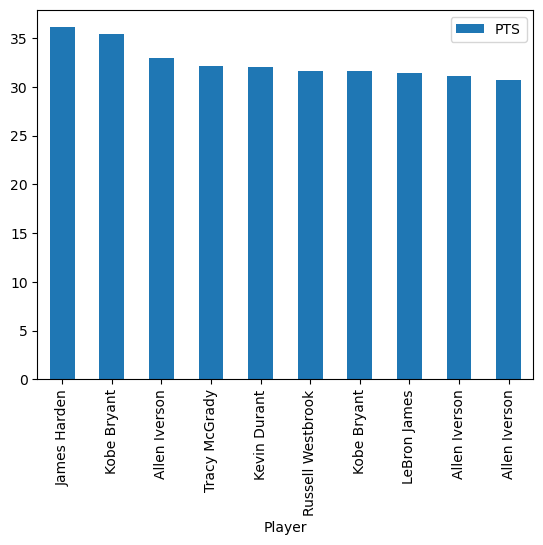

In [154]:
highest_scoring.plot.bar("Player", "PTS")

In [155]:
highest_scoring_per_year = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending = False).head(1))
highest_scoring_per_year

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1994,8463,David Robinson,C,28,SAS,80,80,40.5,10.5,20.7,0.507,...,1010.0,0.723,San Antonio Spurs,55,27,0.671,3.0,100.0,94.8,5.05
1995,7220,Shaquille O'Neal,C,22,ORL,79,79,37.0,11.8,20.2,0.583,...,1050.0,0.576,Orlando Magic,57,25,0.695,0.0,110.9,103.8,6.44
1996,10191,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,0.495,...,1130.0,0.986,Chicago Bulls,72,10,0.878,0.0,105.2,92.9,11.80
1997,10205,Michael Jordan,SG,33,CHI,82,82,37.9,11.2,23.1,0.486,...,1150.0,0.832,Chicago Bulls,69,13,0.841,0.0,103.1,92.3,10.70
1998,10219,Michael Jordan,SG,34,CHI,82,82,38.8,10.7,23.1,0.465,...,1160.0,0.934,Chicago Bulls,62,20,0.756,0.0,96.7,89.6,7.24
1999,914,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,0.412,...,1180.0,0.270,Philadelphia 76ers,28,22,0.560,5.0,89.7,87.6,2.56
2000,103,Shaquille O'Neal,C,27,LAL,79,79,40.0,12.1,21.1,0.574,...,1210.0,0.998,Los Angeles Lakers,67,15,0.817,0.0,100.8,92.3,8.41
2001,945,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,0.420,...,1240.0,0.904,Philadelphia 76ers,56,26,0.683,0.0,94.7,90.4,3.64
2002,961,Allen Iverson,SG,26,PHI,60,59,43.7,11.1,27.8,0.398,...,1260.0,0.023,Philadelphia 76ers,43,39,0.524,9.0,91.0,89.4,1.27


<AxesSubplot:xlabel='Year'>

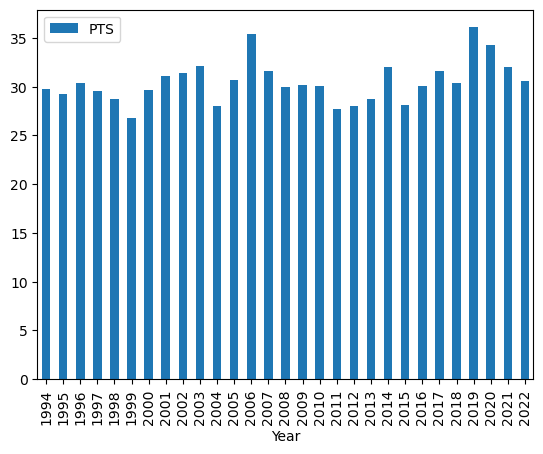

In [156]:
highest_scoring_per_year.plot.bar("Year", "PTS")

In [157]:
stats.groupby("Year").apply(lambda x: x.shape[0])

Year
1994    403
1995    405
1996    428
1997    441
1998    439
1999    440
2000    439
2001    441
2002    440
2003    428
2004    442
2005    464
2006    458
2007    458
2008    450
2009    443
2010    442
2011    452
2012    478
2013    467
2014    480
2015    492
2016    476
2017    486
2018    540
2019    530
2020    529
2021    540
2022    605
dtype: int64

In [158]:
stats.corr()["Share"]

Age        0.016613
G          0.089082
GS         0.166623
MP         0.159631
FG         0.273761
FGA        0.246036
FG%        0.063371
3P         0.096227
3PA        0.095551
3P%        0.013929
2P         0.275677
2PA        0.251609
2P%        0.058876
eFG%       0.056000
FT         0.317830
FTA        0.323945
FT%        0.035585
ORB        0.099525
DRB        0.214369
TRB        0.187103
AST        0.203531
STL        0.167313
BLK        0.149243
TOV        0.234934
PF         0.070685
PTS        0.285579
Year      -0.007872
Pts Won    0.995971
Pts Max    0.523901
Share      1.000000
W          0.118658
L         -0.118285
W/L%       0.122908
GB        -0.097429
PS/G       0.041035
PA/G      -0.038116
SRS        0.118221
Name: Share, dtype: float64